In [1]:
from torch.utils.data import DataLoader, Subset
import random
import torch
import figure_names
from eigenestimation.evaluation.top_logits import compute_jacobian
from importlib import reload
# reload compute jacobiab
import sys
import torchvision.transforms as transforms
import torch
import torchvision
from eigenestimation.evaluation.top_logits import compute_jacobian
from eigenestimation.evaluation.top_images import compute_circuit_vals

from eigenestimation.toy_models.cnn_wrapper import ImageOnlyDataset
import gc
import torch
from tqdm import tqdm

checkpoints_path = "/root/eigenestimation/outputs/eigenmodels/"
eigenmodel_path = checkpoints_path + "mobilenet-v3-eigenmodel.pt"
eigenmodel = torch.load(eigenmodel_path)['model']

circuit_vals = torch.load(checkpoints_path + "mobilenet-v3-eigenmodel-circuit_attributions.pt")
X_ordered = torch.load(checkpoints_path + "mobilenet-v3-eigenmodel-X_data.pt")
frac_activated = torch.load(eigenmodel_path)['frac_activated']


In [2]:
from urllib.request import urlopen
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_classes = urlopen(url).read().decode("utf-8").splitlines()

---feature 0: 0.01---
---feature 1: 0.13---


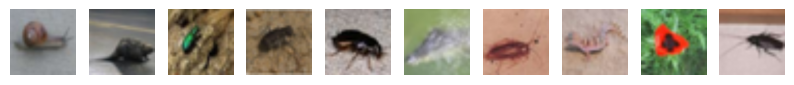

---feature 2: 0.07---


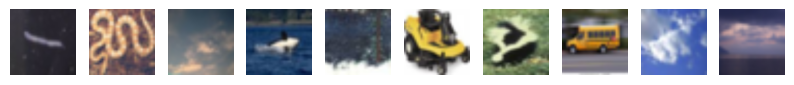

---feature 3: 0.12---


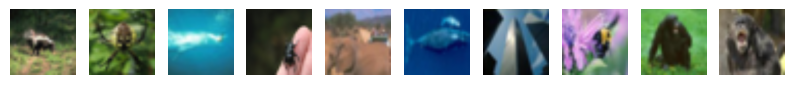

---feature 4: 0.06---


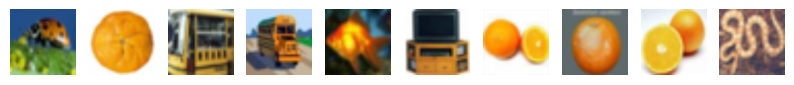

---feature 5: 0.00---
---feature 6: 0.08---


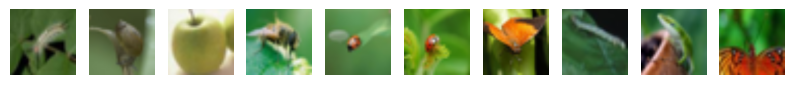

---feature 7: 0.04---


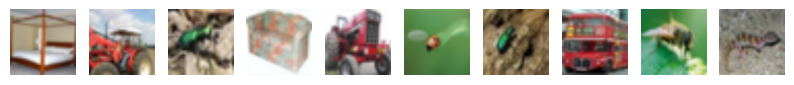

---feature 8: 0.12---


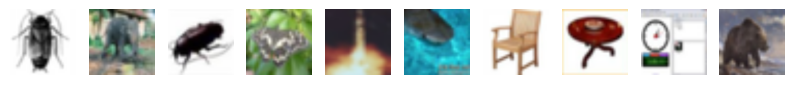

---feature 9: 0.04---


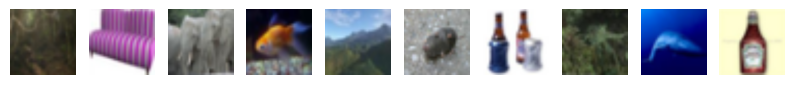

---feature 10: 0.13---


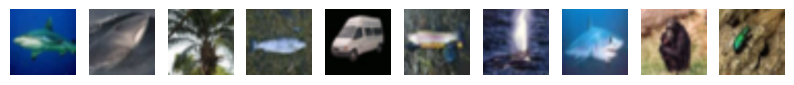

---feature 11: 0.29---


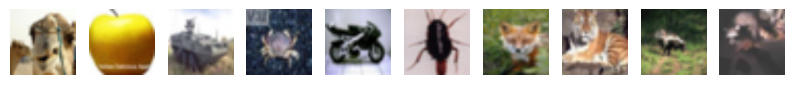

---feature 12: 0.03---


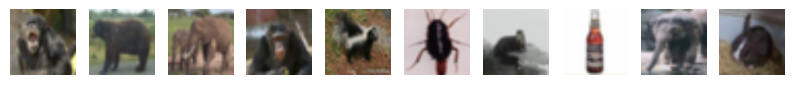

---feature 13: 0.23---


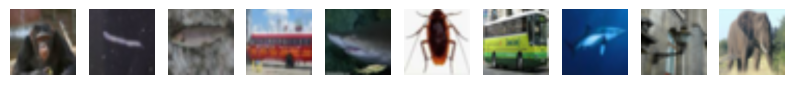

---feature 14: 0.00---
---feature 15: 0.12---


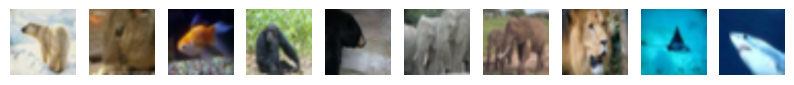

---feature 16: 0.12---


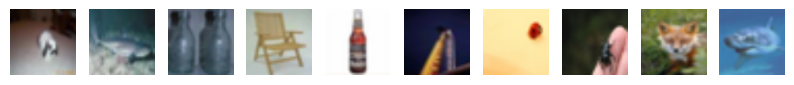

---feature 17: 0.16---


---feature 18: 0.13---


---feature 19: 0.15---


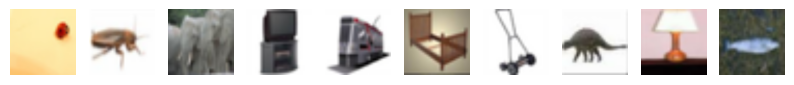

---feature 20: 0.06---


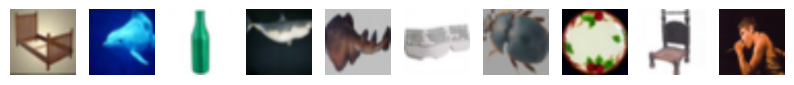

---feature 21: 0.14---


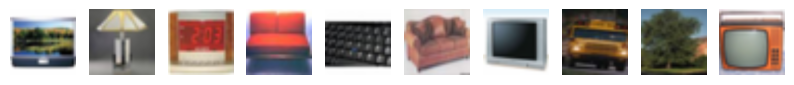

---feature 22: 0.08---


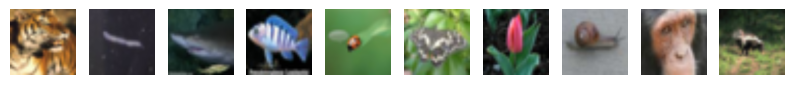

---feature 23: 0.38---


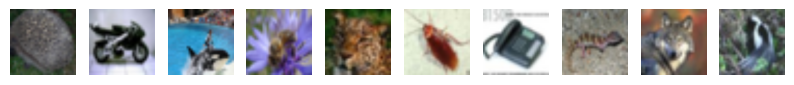

---feature 24: 0.02---


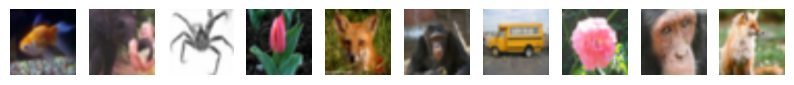

---feature 25: 0.21---


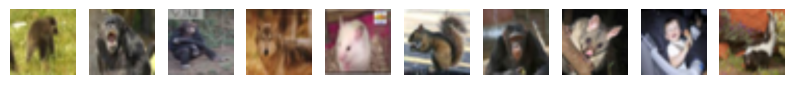

---feature 26: 0.09---


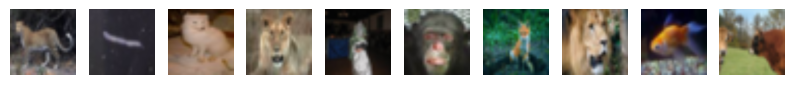

---feature 27: 0.12---


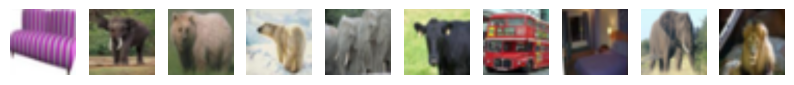

---feature 28: 0.01---


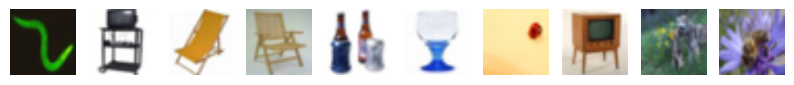

---feature 29: 0.08---


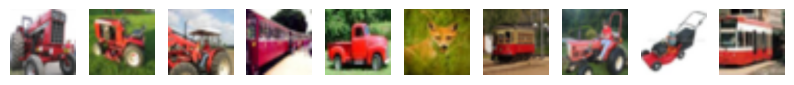

---feature 30: 0.18---


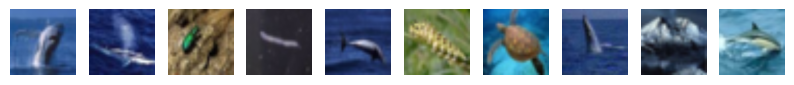

---feature 31: 0.25---


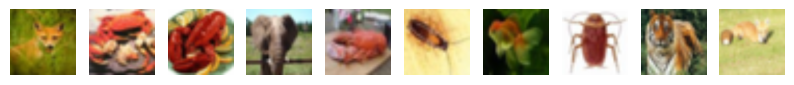

---feature 32: 0.20---


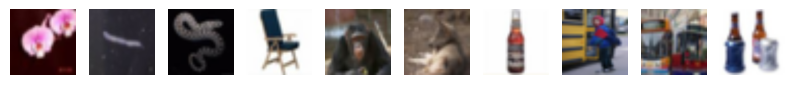

---feature 33: 0.09---


---feature 34: 0.00---
---feature 35: 0.02---


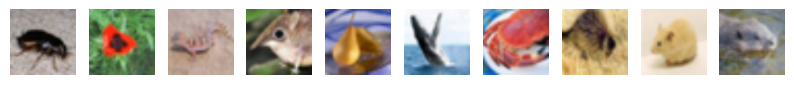

---feature 36: 0.05---


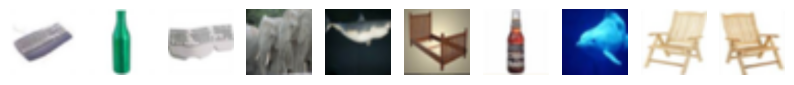

---feature 37: 0.24---


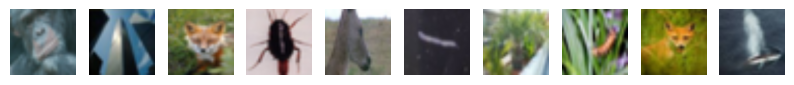

---feature 38: 0.00---
---feature 39: 0.00---
---feature 40: 0.00---
---feature 41: 0.23---


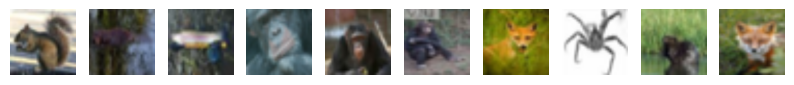

---feature 42: 0.19---


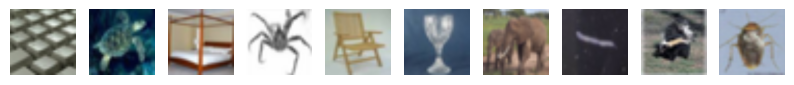

---feature 43: 0.10---


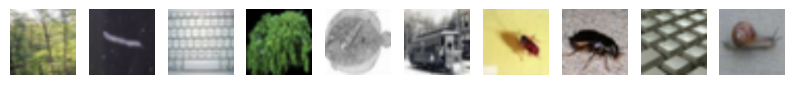

---feature 44: 0.08---


---feature 45: 0.00---
---feature 46: 0.10---


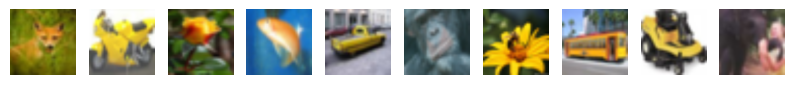

---feature 47: 0.03---


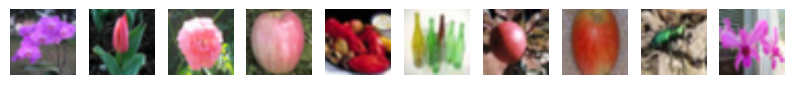

---feature 48: 0.02---


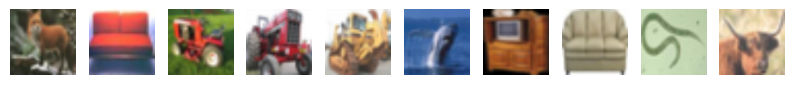

---feature 49: 0.20---


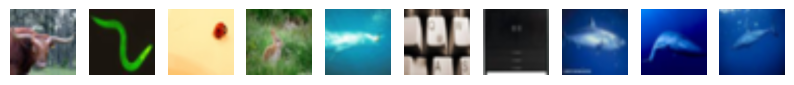

---feature 50: 0.20---


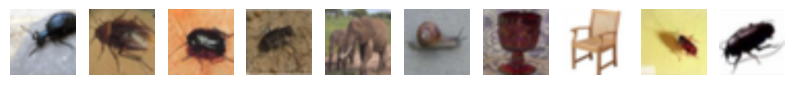

---feature 51: 0.08---


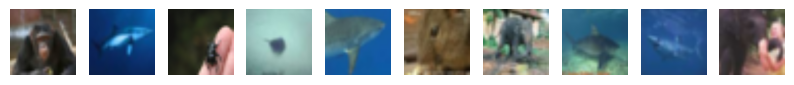

---feature 52: 0.10---


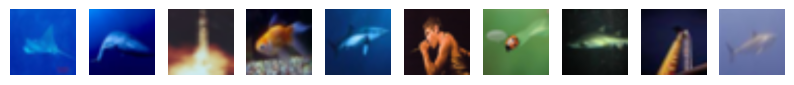

---feature 53: 0.06---


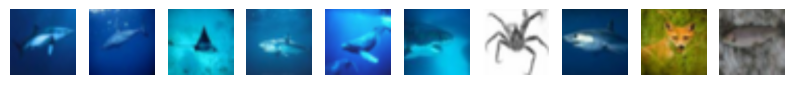

---feature 54: 0.07---


---feature 55: 0.09---


---feature 56: 0.14---


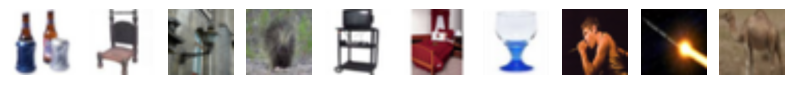

---feature 57: 0.12---


---feature 58: 0.04---


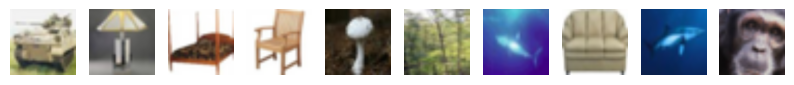

---feature 59: 0.00---
---feature 60: 0.00---
---feature 61: 0.15---


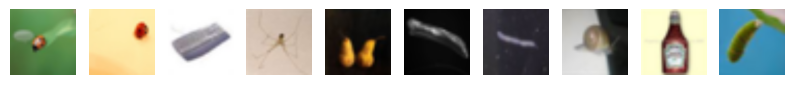

---feature 62: 0.15---


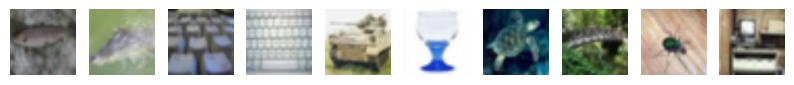

---feature 63: 0.04---


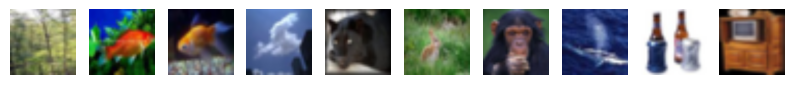

---feature 64: 0.00---
---feature 65: 0.45---


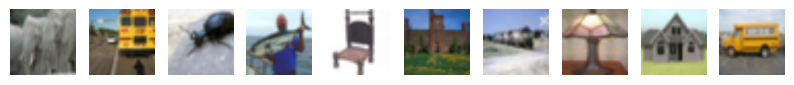

---feature 66: 0.01---
---feature 67: 0.13---


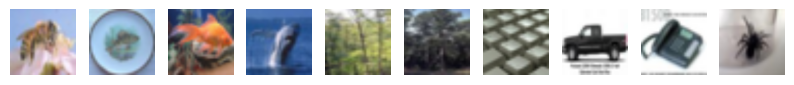

---feature 68: 0.17---


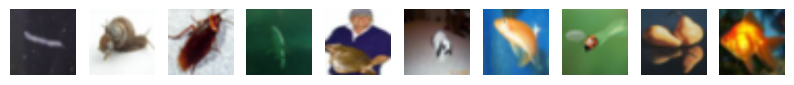

---feature 69: 0.12---


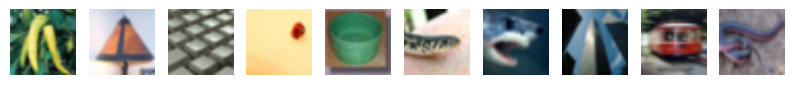

---feature 70: 0.11---


---feature 71: 0.05---


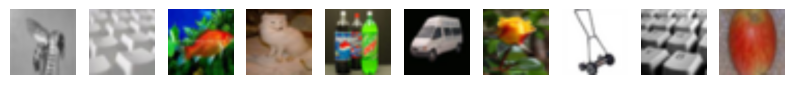

---feature 72: 0.08---


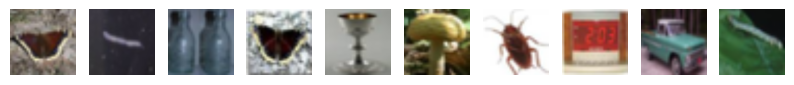

---feature 73: 0.00---
---feature 74: 0.02---


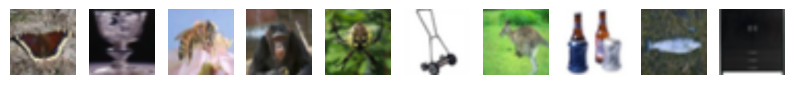

---feature 75: 0.12---


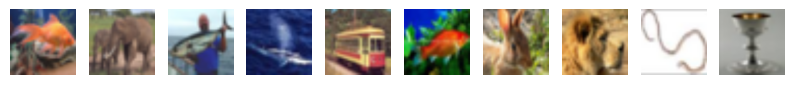

---feature 76: 0.18---


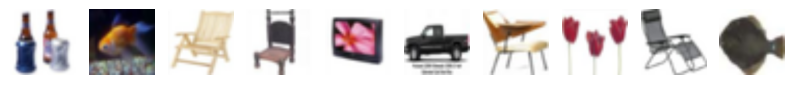

---feature 77: 0.00---
---feature 78: 0.07---


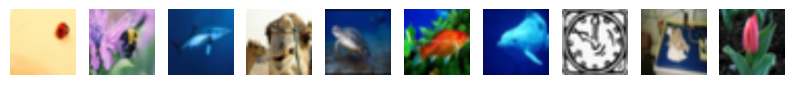

---feature 79: 0.12---


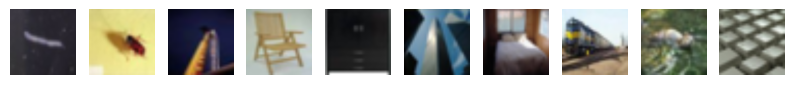

---feature 80: 0.11---


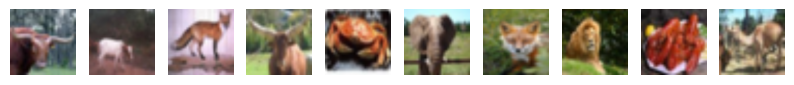

---feature 81: 0.10---


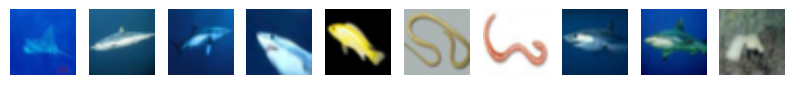

---feature 82: 0.08---


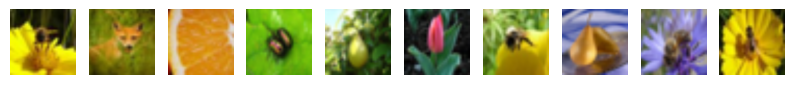

---feature 83: 0.16---


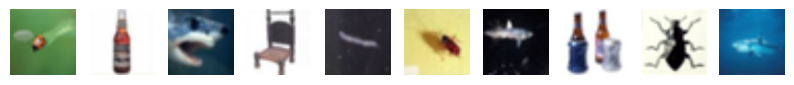

---feature 84: 0.07---


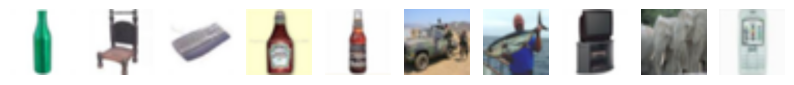

---feature 85: 0.16---


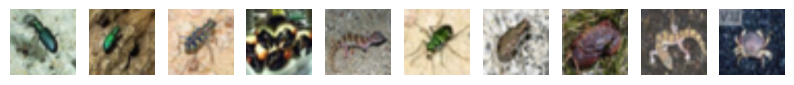

---feature 86: 0.13---


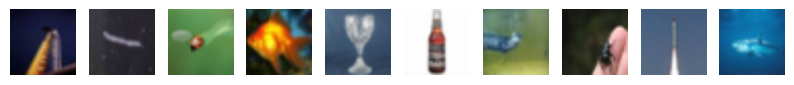

---feature 87: 0.00---
---feature 88: 0.04---


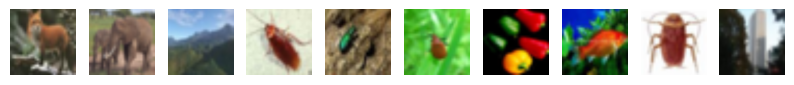

---feature 89: 0.18---


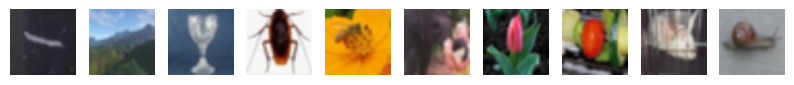

---feature 90: 0.08---


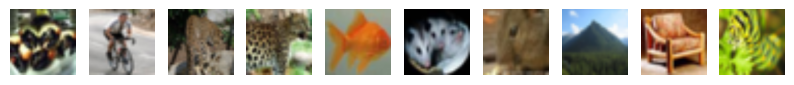

---feature 91: 0.03---


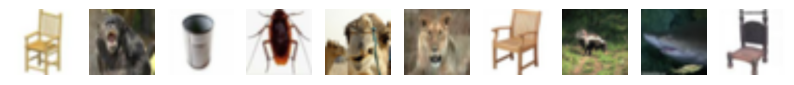

---feature 92: 0.06---


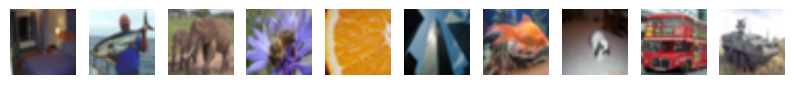

---feature 93: 0.12---


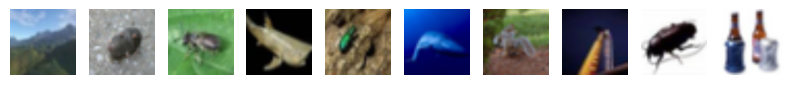

---feature 94: 0.15---


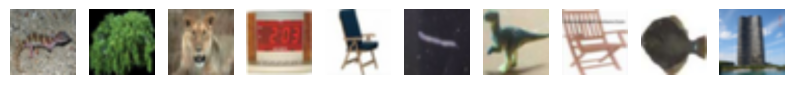

---feature 95: 0.22---


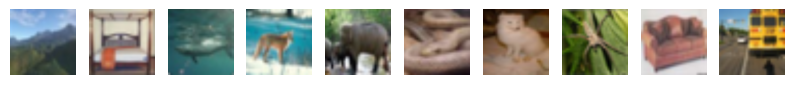

---feature 96: 0.11---


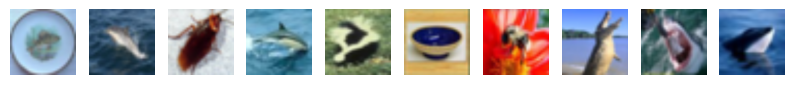

---feature 97: 0.08---


---feature 98: 0.02---


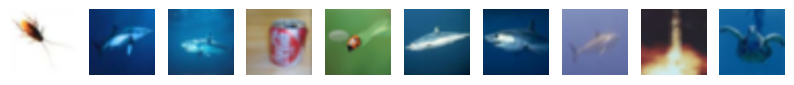

---feature 99: 0.06---


In [ ]:
import matplotlib.pyplot as plt
topk = 10
for i in range(100):
    print(f'---feature {i}: {frac_activated[i]:.2f}---')
    top_circuit_vals = abs(circuit_vals[:,i]).topk(topk).indices
    top_images = X_ordered[top_circuit_vals]
    if frac_activated[i] < .01: continue

    # Plot top_images as subplots
    fig, axes = plt.subplots(1, topk, figsize=(1*topk, 1))
    for image_idx, ax in enumerate(axes.flatten()):
        #jac = compute_jacobian(eigenmodel, top_images[image_idx].to('cuda'), i, device='cuda', has_token_dim=False)
        ax.imshow(top_images[image_idx].permute(1, 2, 0).detach().cpu().numpy())
        ax.axis('off')
        #ax.text(0, 225, 'top\n' + '\n'.join([imagenet_classes[c] for c in (jac).argsort(descending=True)[:5].tolist()]), ha='left', va='top', fontsize=5)
        
        #ax.text(0, 400, 'bottom:\n' + '\n'.join([imagenet_classes[c] for c in (jac).argsort(descending=False)[:5].tolist()]), ha='left', va='top', fontsize=5)
        #ax.set_title(f'{circuit_vals[top_circuit_vals[image_idx],i].item():.2f}', size=10)


In [12]:
figure_names.top_images_eigenmodel = '/root/eigenestimation/figures/poster/poster_top_images_feature_%i.svg'

---feature 82: 0.08---


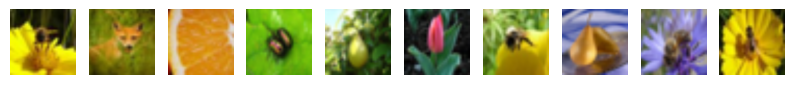

---feature 85: 0.16---


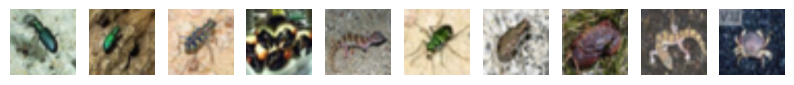

---feature 81: 0.10---


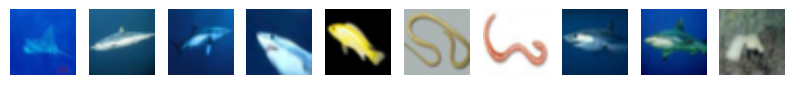

---feature 99: 0.06---


---feature 76: 0.18---


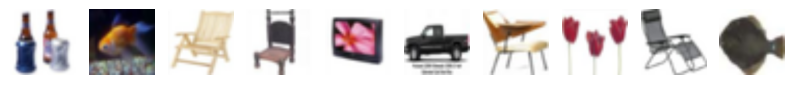

---feature 50: 0.20---


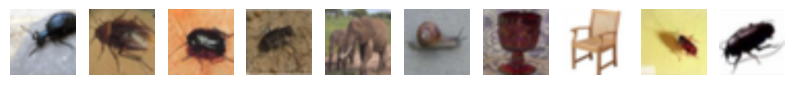

---feature 33: 0.09---


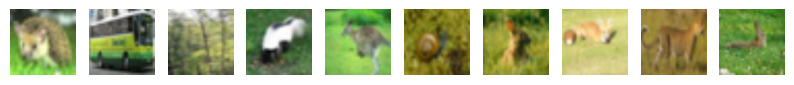

---feature 29: 0.08---


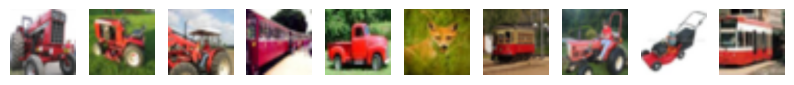

---feature 1: 0.13---


---feature 4: 0.06---


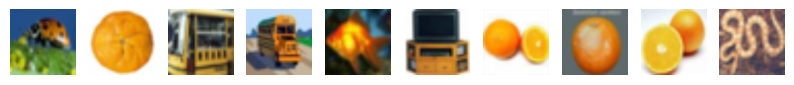

---feature 6: 0.08---


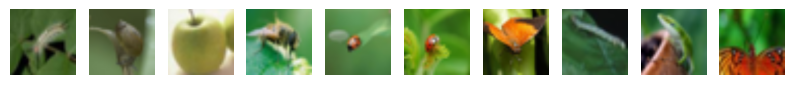

---feature 21: 0.14---


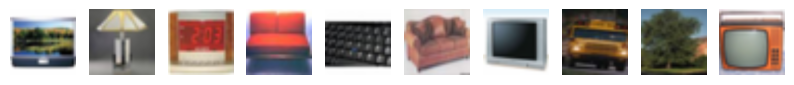

---feature 18: 0.13---


In [13]:
import matplotlib.pyplot as plt
topk = 10
interesting_features = [82, 85, 81, 99, 76, 50, 33, 29, 1, 4, 6, 21, 18]
for i in interesting_features:
    print(f'---feature {i}: {frac_activated[i]:.2f}---')
    top_circuit_vals = abs(circuit_vals[:,i]).topk(topk).indices
    top_images = X_ordered[top_circuit_vals]
    if frac_activated[i] < .01: continue

    # Plot top_images as subplots
    fig, axes = plt.subplots(1, topk, figsize=(1*topk, 1))
    for image_idx, ax in enumerate(axes.flatten()):

        ax.imshow(top_images[image_idx].permute(1, 2, 0).detach().cpu().numpy())
        ax.axis('off')
    fig.savefig(figure_names.top_images_eigenmodel % i, transparent=True, bbox_inches='tight')
    plt.show()
